In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# Import the sqlalchemy extract function.
from sqlalchemy import extract
sqlalchemy.__version__

'1.4.42'

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
type(results)

list

In [5]:
# Since SQLAlchemy session.query().all() returns a list of tuples, the following is list() redundant
# 2. Convert the June temperatures to a list (flattened).
jun_temps = list(np.ravel(results))
print(jun_temps)

['2010-06-01', '78.0', '2010-06-02', '76.0', '2010-06-03', '78.0', '2010-06-04', '76.0', '2010-06-05', '77.0', '2010-06-06', '78.0', '2010-06-07', '77.0', '2010-06-08', '78.0', '2010-06-09', '78.0', '2010-06-10', '79.0', '2010-06-11', '78.0', '2010-06-12', '78.0', '2010-06-13', '78.0', '2010-06-14', '77.0', '2010-06-15', '78.0', '2010-06-16', '78.0', '2010-06-17', '77.0', '2010-06-18', '77.0', '2010-06-19', '82.0', '2010-06-20', '78.0', '2010-06-21', '78.0', '2010-06-22', '78.0', '2010-06-23', '78.0', '2010-06-24', '78.0', '2010-06-25', '77.0', '2010-06-26', '76.0', '2010-06-27', '78.0', '2010-06-28', '78.0', '2010-06-29', '78.0', '2010-06-30', '78.0', '2011-06-01', '77.0', '2011-06-02', '78.0', '2011-06-03', '73.0', '2011-06-04', '70.0', '2011-06-05', '76.0', '2011-06-06', '77.0', '2011-06-07', '77.0', '2011-06-08', '77.0', '2011-06-09', '77.0', '2011-06-10', '78.0', '2011-06-11', '77.0', '2011-06-12', '77.0', '2011-06-13', '78.0', '2011-06-14', '78.0', '2011-06-15', '77.0', '2011-06-

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(results, columns=['date', 'June Temps'])
jun_df.head()

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
type(results)

list

In [10]:
# Since SQLAlchemy session.query().all() returns a list of tuples, the following is list() redundant
# 7. Convert the December temperatures to a list (flattened).
dec_temps = list(np.ravel(results))
print(dec_temps)

['2010-12-01', '76.0', '2010-12-03', '74.0', '2010-12-04', '74.0', '2010-12-06', '64.0', '2010-12-07', '64.0', '2010-12-08', '67.0', '2010-12-09', '77.0', '2010-12-10', '66.0', '2010-12-11', '69.0', '2010-12-12', '68.0', '2010-12-13', '68.0', '2010-12-14', '71.0', '2010-12-15', '74.0', '2010-12-16', '67.0', '2010-12-17', '66.0', '2010-12-18', '69.0', '2010-12-19', '71.0', '2010-12-23', '70.0', '2010-12-24', '70.0', '2010-12-26', '74.0', '2010-12-27', '74.0', '2010-12-28', '71.0', '2010-12-29', '75.0', '2010-12-30', '75.0', '2010-12-31', '72.0', '2011-12-01', '69.0', '2011-12-02', '68.0', '2011-12-03', '73.0', '2011-12-04', '74.0', '2011-12-05', '73.0', '2011-12-06', '73.0', '2011-12-07', '73.0', '2011-12-08', '73.0', '2011-12-09', '71.0', '2011-12-10', '73.0', '2011-12-11', '73.0', '2011-12-12', '77.0', '2011-12-13', '72.0', '2011-12-14', '71.0', '2011-12-15', '73.0', '2011-12-16', '70.0', '2011-12-17', '73.0', '2011-12-18', '69.0', '2011-12-19', '74.0', '2011-12-20', '72.0', '2011-12-

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(results, columns=['date', 'December Temps'])
dec_df.head()

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

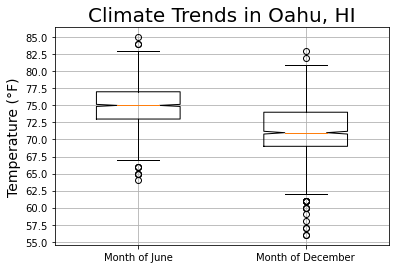

In [14]:
# Create a box-and-whisker plot for June vs December temps
dfs = [jun_df['June Temps'], dec_df['December Temps']]
labels = ['Month of June', 'Month of December']
fig, ax = plt.subplots()
ax.boxplot(dfs, labels=labels, notch=True, widths=0.5)
# Add the title, y-axis label and grid.
ax.set_title('Climate Trends in Oahu, HI', fontsize=20)
ax.set_ylabel('Temperature (\N{DEGREE SIGN}F)', fontsize=14)
ax.set_yticks(np.arange(55, 86, step=2.5))
ax.grid()
# Save the figure.
plt.savefig('./Data/climate_trends_boxplot.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

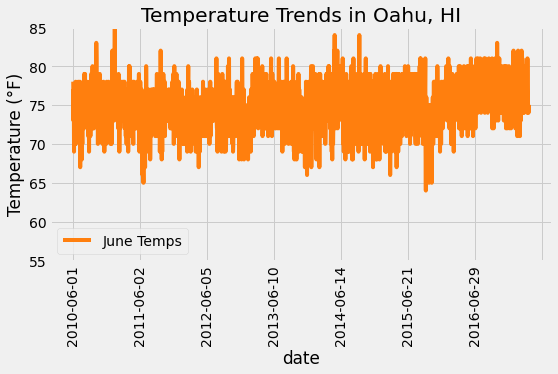

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
from matplotlib import style
style.use('fivethirtyeight')
jun_df.set_index(jun_df['date'], inplace=True)
jun_df = jun_df.sort_index()
jun_df.plot(figsize=(8,4), title='Temperature Trends in Oahu, HI', rot=90, color='tab:orange')
plt.ylim(55, 85)
plt.ylabel('Temperature (\N{DEGREE SIGN}F)')
# Save the figure.
plt.savefig('./Data/climate_jun_temp.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

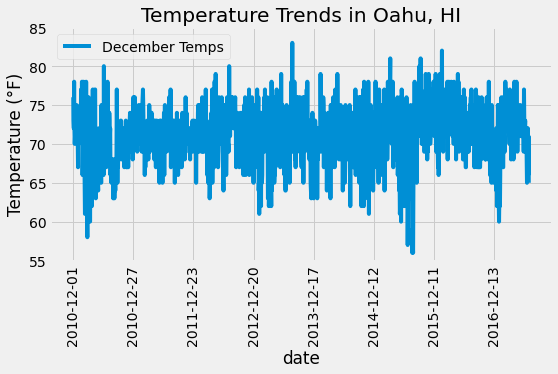

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
dec_df.set_index(dec_df['date'], inplace=True)
dec_df = dec_df.sort_index()
dec_df.plot(figsize=(8,4), title='Temperature Trends in Oahu, HI', rot=90)
plt.ylim(55, 85)
plt.ylabel('Temperature (\N{DEGREE SIGN}F)')
# Save the figure.
plt.savefig('./Data/climate_dec_temp.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

In [17]:
# Added: Write a query that filters the Measurement table to retrieve both tobs and prcp for the month of June. 
results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date) == 6).all()
jun_df = pd.DataFrame(results, columns=['date', 'June Temps', 'June Precipitation'])
jun_df.describe()

,June Temps,June Precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [18]:
# Added: Write a query that filters the Measurement table to retrieve both tobs and prcp for the month of December. 
results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date) == 12).all()
dec_df = pd.DataFrame(results, columns=['date', 'December Temps', 'December Precipitation'])
dec_df.describe()

,December Temps,December Precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [19]:
# Merge summary statistics of June and December
pd.merge(jun_df.describe(), dec_df.describe(), left_index=True, right_index=True)

,June Temps,June Precipitation,December Temps,December Precipitation
count,1700.000000,1574.000000,1517.000000,1405.000000
mean,74.944118,0.136360,71.041529,0.216819
std,3.257417,0.335731,3.745920,0.541399
min,64.000000,0.000000,56.000000,0.000000
25%,73.000000,0.000000,69.000000,0.000000
50%,75.000000,0.020000,71.000000,0.030000
75%,77.000000,0.120000,74.000000,0.150000
max,85.000000,4.430000,83.000000,6.420000


In [20]:
# Reimport Matplotlib.
import matplotlib
# Reset the style from Matplotlib to default.
matplotlib.rcParams.update(matplotlib.rcParamsDefault)